In [1]:
#!pip install matplotlib --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy import signal

In [3]:
syspath='../data'
#'C:/Users/gredi/Desktop/MADS/696_Milestone2/github/milestoneII/data'
#sys_path='/root/work/milestoneII/data' ## for deepnote

## import data
data=pd.read_csv(syspath+'/full_data_tr.csv')
var_cycle=['date', 'CLI_MA','CLI_N','CLI_T','GDP_RTT','GDP_N','GDP_T',
           'y_nber','y_oecd','y_agg']
data=data.loc[:,var_cycle]

data['date']=pd.DatetimeIndex(data['date'])
data=data.set_index('date')

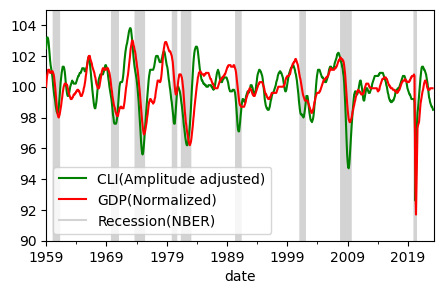

In [4]:
fig, ax=plt.subplots(figsize=(5,3))

lines=data[['CLI_MA','GDP_N']].plot(ax=ax, color=['green','red'], zorder=200)
area=(data['y_nber']*1000).plot.area(ax=ax, color='#d3d3d3')
ax.set_ylim([90,105])
ax.legend(['CLI(Amplitude adjusted)','GDP(Normalized)','Recession(NBER)'])

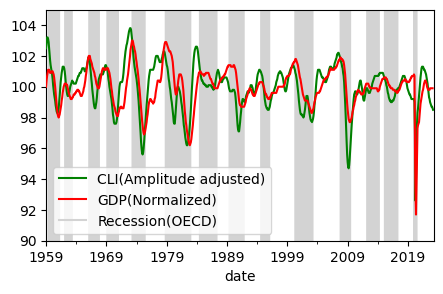

In [5]:
fig, ax=plt.subplots(figsize=(5,3))

lines=data[['CLI_MA','GDP_N']].plot(ax=ax, color=['green','red'], zorder=200)
area=(data['y_oecd']*1000).plot.area(ax=ax, color='#d3d3d3')
ax.set_ylim([90,105])
ax.legend(['CLI(Amplitude adjusted)','GDP(Normalized)','Recession(OECD)'])


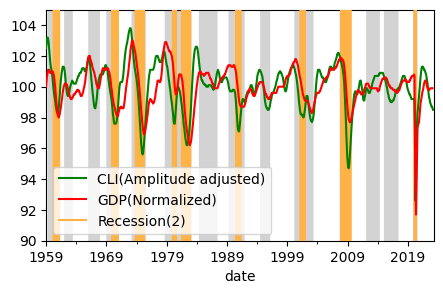

In [6]:
fig, ax=plt.subplots(figsize=(5,3))

lines=data[['CLI_MA','GDP_N']].plot(ax=ax, color=['green','red'], zorder=200)
area=(data['y_nber']*1000).plot.area(ax=ax, color='#ffb347', zorder=3)
area=(data['y_oecd']*1000).plot.area(ax=ax, color='#d3d3d3')


ax.set_ylim([90,105])
ax.legend(['CLI(Amplitude adjusted)','GDP(Normalized)','Recession(2)'])

In [13]:
nber=data.y_nber.value_counts()
oecd=data.y_oecd.value_counts()
agg=data.y_agg.value_counts()

pd.DataFrame({'y_nber':[nber[0],nber[1],0],
              'y_oecd':[oecd[0],oecd[1],0],
              'y_agg':[agg[0],agg[1],agg[2]]}, index=[0,1,2])/772

,y_nber,y_oecd,y_agg
0,0.876943,0.590674,0.589378
1,0.123057,0.409326,0.288860
2,0.000000,0.000000,0.121762


In [12]:
data

,CLI_MA,CLI_N,CLI_T,GDP_RTT,GDP_N,GDP_T,y_nber,y_oecd,y_agg
date,,,,,,,,,
1959-01-01,102.5,102.3,18.3,100.0,100.0,17.9,0.0,0.0,0.0
1959-02-01,102.9,102.6,18.4,100.4,100.4,17.9,0.0,0.0,0.0
1959-03-01,103.2,102.8,18.5,100.8,100.7,18.0,0.0,0.0,0.0
1959-04-01,103.2,102.9,18.6,101.0,100.9,18.0,0.0,0.0,0.0
1959-05-01,103.1,102.8,18.6,101.2,101.1,18.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-12-01,98.7,98.9,114.8,99.9,99.9,116.3,0.0,0.0,0.0
2023-01-01,98.7,98.8,114.9,99.9,99.9,116.4,0.0,0.0,0.0
2023-02-01,98.6,98.8,115.0,99.9,99.9,116.6,0.0,0.0,0.0
